In [1]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("YlGnBu", 10)
pd.set_option('display.max_columns', None)

## Reading the dataset

#### Reading the `application_data.csv` using pandas

In [2]:
application_data = pd.read_csv('./application_data.csv')
application_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Understanding dataframe and columns data type

In this step we understand below two things

- Checking the shape of dataframe
- The data type of the columns

In [3]:
print('Shape of the dataframe')
print(application_data.shape)
print()
print('Dataframe Info')
print()
application_data.info()

Shape of the dataframe
(307511, 122)

Dataframe Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Data quality and missing value checks 

#### Finding the percentage of missing values for all columns

In [4]:
# Finding the percentage of missing values for all columns
print('Percentage of rows null in each column')
columns = round(application_data.isnull().sum() / len(application_data) * 100, 2)
columns

Percentage of rows null in each column


SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

#### Removing columns with >= 50% null values

In [5]:
# dropping columns that have rows 50% or more null

application_data = application_data.drop(columns[columns >= 50].index, axis=1)
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [6]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Checking number of columns in the Datafram
print('Percentage of rows null in each column')
columns = round(application_data.isnull().sum() / len(application_data) * 100, 2)

columns[columns > 0]

Percentage of rows null in each column


AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
OCCUPATION_TYPE                 31.35
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
YEARS_BEGINEXPLUATATION_AVG     48.78
FLOORSMAX_AVG                   49.76
YEARS_BEGINEXPLUATATION_MODE    48.78
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_MEDI    48.78
FLOORSMAX_MEDI                  49.76
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
DEF_60_CNT_SOCIAL_CIRCLE         0.33
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
dtype: float64

## Handling missing values

For columns with 13% or less than null, values, let us check what method we can adopt to impute them.

### Column `AMT_REQ_CREDIT_BUREAU_DAY`
The column has 13.5% values missing and below simply describing and looking at the normalized `value_counts` will give us an idea of how to impute the missing values.


##### Method to impute values
The `mean` and `median` of the values are really close and `99.4` of the values are at 0, so we can perfectly impute/replace the missing values with **`0.00`**.

In [8]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [9]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True) * 100

0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

### Column `NAME_TYPE_SUITE`
The column is of categorical type with total of 7 categories and there are total of 0.19%.

##### Method to impute values
The `value_counts` method gives the result that category `Unaccompanied` is used in appx 81% rows and is also the `mode` for the column.

We can perfectly replace/impute missing values with `Unaccompanied`. 

In [10]:
application_data['NAME_TYPE_SUITE'].value_counts(normalize=True) * 100

Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: NAME_TYPE_SUITE, dtype: float64

In [11]:
application_data['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
dtype: object

### Column `OBS_30_CNT_SOCIAL_CIRCLE`
This column has `0.33%` values missing. 

On describe the column, we can see there are outliers in the column with values **348** whereas the `mean` is **1.422** and `median` is **0.00**. It is also notable from method `value_counts` that almost `54%` of the values in the column are **0**.


##### Method to impute values
As there are outliers because of which the `mean` is also skwed from the `median`, is why it is suggested to replace/impute values using `median` i.e **0.0**.

In [12]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [13]:
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True) * 100

0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
24.0      0.003589
25.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
28.0      0.000326
348.0     0.000326
29.0      0.000326
47.0      0.000326
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

## Converting values

### Column: `DAYS_BIRTH`

The values are negative here, we first convert them in positive

In [14]:
# Getting the absolute value of the column
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])

application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Checking outliers

Checking outliers must be done for all quantitative columns in the dataframe.

In [15]:
quants = application_data.select_dtypes(['float', 'int'])

quants.quantile([0, 0.99, 1])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0.00,100002.0,0.0,0.0,25650.0,45000.0,1615.5,40500.0,0.000290,7489.0,-17912.0,-24672.0,-7197.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.173617e-08,0.000527,0.000,0.0000,0.000,0.0000,0.000,0.0000,0.0000,0.0,0.0,0.0,0.0,-4292.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.99,452712.9,1.0,3.0,472500.0,1854000.0,70006.5,1800000.0,0.072508,24419.0,365243.0,-50.0,-61.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,19.0,1.0,1.0,1.0,1.0,1.0,1.0,7.827928e-01,0.832785,0.999,0.6667,0.999,0.6667,0.999,0.6667,0.5258,10.0,2.0,10.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,8.0
1.00,456255.0,1.0,19.0,117000000.0,4050000.0,258025.5,4050000.0,0.072508,25229.0,365243.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,3.0,3.0,23.0,1.0,1.0,1.0,1.0,1.0,1.0,8.549997e-01,0.896010,1.000,1.0000,1.000,1.0000,1.000,1.0000,1.0000,348.0,34.0,344.0,24.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,9.0,8.0,27.0,261.0,25.0


### Column `AMT_INCOME_TOTAL`

Here values till 99 percentile don't have much variation but after 99 percentile we can see the shift in values.
Above conclusion can also be confirmed with a box plot as well.

In [16]:
application_data['AMT_INCOME_TOTAL'].quantile([0, 0.25, 0.50, 0.75, 0.99, 1])

0.00        25650.0
0.25       112500.0
0.50       147150.0
0.75       202500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

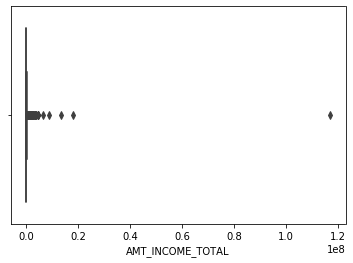

In [17]:
# Let us check this on a box plot and see if there are any outliers
sns.boxplot(application_data['AMT_INCOME_TOTAL'])
plt.show()

### Column `AMT_ANNUITY`

In this column we can conclude that the difference between 99 percentile and 100 percentile is huge and is also confirmed with a box plot.

It is concluded that the column has outliers

In [18]:
application_data['AMT_ANNUITY'].quantile([0, 0.25, 0.50, 0.75, 0.99, 1])

0.00      1615.5
0.25     16524.0
0.50     24903.0
0.75     34596.0
0.99     70006.5
1.00    258025.5
Name: AMT_ANNUITY, dtype: float64

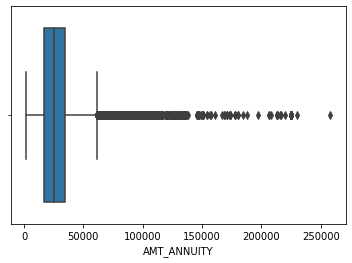

In [19]:
sns.boxplot(application_data['AMT_ANNUITY'])
plt.show()

For below columns as well, we can see the difference with 99 percentile and 100 percentile are high

1. AMT_INCOME_TOTAL
2. AMT_ANNUITY
3. CNT_FAM_MEMBERS
4. TOTALAREA_MODE
5. OBS_30_CNT_SOCIAL_CIRCLE
6. OBS_60_CNT_SOCIAL_CIRCLE
6. AMT_REQ_CREDIT_BUREAU_QRT
7. CNT_CHILDREN

We can say that these fields contains outliers.

## Binning variables

**Note:** For all columns we are adding the bin values in a column in dataframe as we will use this further for analysis.

### Column `AMT_CREDIT`

In [20]:
bins = [45000, 225000, 300000, 400000, 600000, 800000, 1000000, 1500000]
slots = ['45001 - 225000', '225001 - 300000', '300001 - 400000', '400001 - 600000', '600001 - 800000', 
        '800001 - 1000000', '1000001 and above']

application_data['AMT_CREDIT_RANGE'] = pd.cut(application_data['AMT_CREDIT'], bins=bins, labels=slots)

### Column `AMT_INCOME_TOTAL`

In [21]:
bins = [25000, 50000, 100000, 200000, 500000, 1000000, 120000000]
slot = ['25K-50K', '50K-1Lac', '1Lac-2Lac', '2Lac-5Lac', '5Lac-10Lac','10Lac and above']
application_data['AMT_INCOME_TOTAL_RANGE'] = pd.cut(application_data['AMT_INCOME_TOTAL'], bins, labels=slot)

### Column `CNT_FAM_MEMBERS`

In [22]:
bins = [1, 3, 6, 11, 16, 20]
slot = ['1-2', '3-5', '6-10', '11-15', '16 and above']
application_data['CNT_FAM_MEMBERS_RANGE'] = pd.cut(application_data['CNT_FAM_MEMBERS'], bins, labels=slot)

### Column `DAYS_BIRTH`



In [23]:
bins = [20, 30, 36, 41, 47, 53, 60, 70]
labels = ['20-30','31-36', '37-41', '42-47', '48-53', '54-60', '61-above']

application_data['AGE_BIRTH_RANGE'] = pd.cut(application_data['DAYS_BIRTH']/365, bins=bins, labels=labels)

### Splitting `application_data` dataframe in two dataframes using `TARGET` column

In [24]:
target_0 = application_data[application_data.TARGET == 0]
target_1 = application_data[application_data.TARGET == 1]

target_0.head()

target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,CNT_FAM_MEMBERS_RANGE,AGE_BIRTH_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,400001 - 600000,2Lac-5Lac,NaN,20-30
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,-2628,-6573.0,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.9732,0.0417,0.9732,0.0417,0.9732,0.0417,0.0085,Yes,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,800001 - 1000000,1Lac-2Lac,NaN,48-53
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,-1262,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.9960,0.2500,0.9960,0.2500,0.9960,0.2500,0.1463,No,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,1000001 and above,2Lac-5Lac,1-2,48-53
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,-3597,-45.0,-4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,225001 - 300000,1Lac-2Lac,1-2,37-41
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,-5391.0,-4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,225001 - 300000,50K-1Lac,1-2,61-above


## Analysis

### Column `NAME_CONTRACT_TYPE`

##### Conclusion
Univariate analysis of this column revels that in the default list with the `Cash loans` type have around `8.35%` of defaulters, more than the `Revolving loans`. 
It is anticipated that `Cash loans` might have more defaults than `Revolving loans`.

In [25]:
application_data['NAME_CONTRACT_TYPE'].value_counts(normalize=False)

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,8.35
1,Revolving loans,5.48


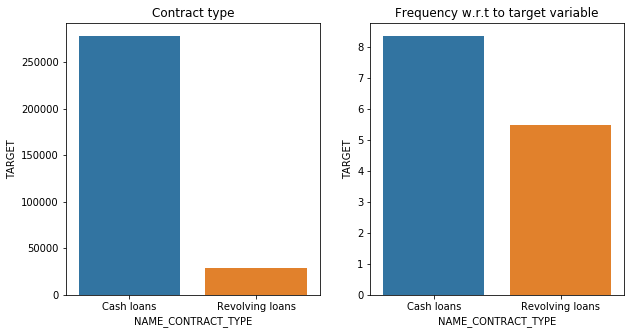

In [26]:
plt.figure(figsize=(10,5))

data = round(target_1.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count()/application_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Contract type')
sns.barplot(x='NAME_CONTRACT_TYPE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
sns.barplot(x='NAME_CONTRACT_TYPE', y='TARGET', data=data)

data

### Column: `AMT_INCOME_TOTAL`

**Note:** We have binned this column above in the binning section.

##### Conclusion

Univariate analysis of this column revels that in the default list, people with income range between 1Lac - 2Lacs have `8.55%` chances of being a default.

,AMT_INCOME_TOTAL_RANGE,TARGET
2,1Lac-2Lac,8.55
1,50K-1Lac,8.25
0,25K-50K,7.59
3,2Lac-5Lac,7.19
4,5Lac-10Lac,5.42
5,10Lac and above,5.20


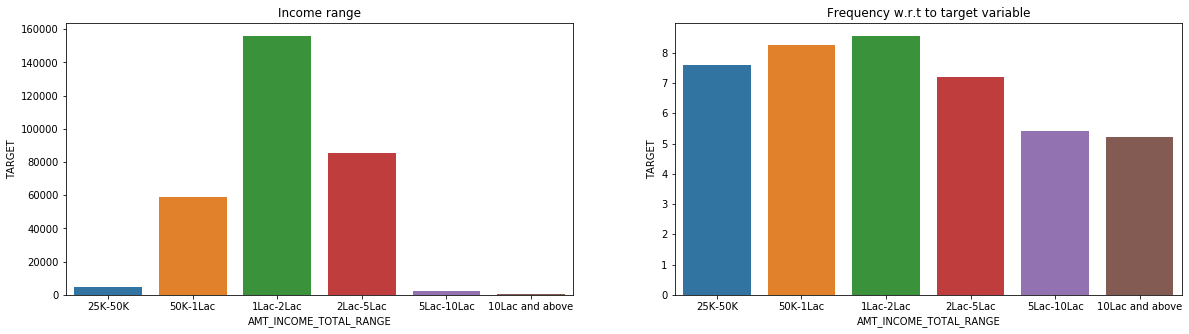

In [27]:
plt.figure(figsize=(20,5))

data = round(target_1.groupby(['AMT_INCOME_TOTAL_RANGE'])['TARGET'].count()/application_data.groupby(['AMT_INCOME_TOTAL_RANGE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = (application_data.groupby(['AMT_INCOME_TOTAL_RANGE'])['TARGET'].count()).reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Income range')
sns.barplot(x='AMT_INCOME_TOTAL_RANGE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
sns.barplot(x='AMT_INCOME_TOTAL_RANGE', y='TARGET', data=data)

data

### Column: `OCCUPATION_TYPE`

##### Conclusion

The `Occupation type` of `Low-skill Laborers` have the chances of around `17.5%` of getting default in loan.

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,17.15
4,Drivers,11.33
17,Waiters/barmen staff,11.28
16,Security staff,10.74
8,Laborers,10.58
2,Cooking staff,10.44
14,Sales staff,9.63
1,Cleaning staff,9.61
13,Realty agents,7.86
15,Secretaries,7.05


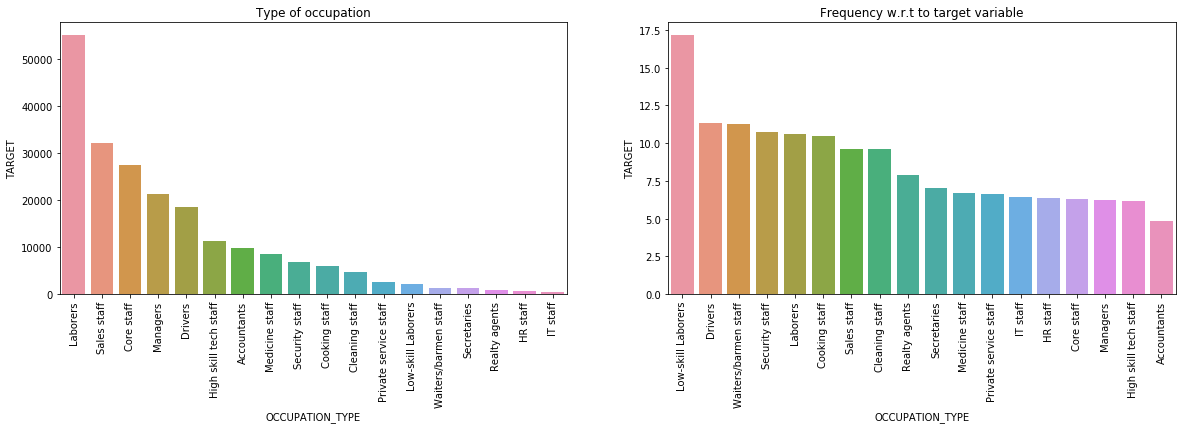

In [28]:
plt.figure(figsize=(20,5))

data = round(target_1.groupby(['OCCUPATION_TYPE'])['TARGET'].count()/application_data.groupby(['OCCUPATION_TYPE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['OCCUPATION_TYPE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Type of occupation')
plt.xticks(rotation=90)
sns.barplot(x='OCCUPATION_TYPE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='OCCUPATION_TYPE', y='TARGET', data=data)

data

### Column `CNT_FAM_MEMBERS`

**Note:** We have done binning this column above in the binning section.

##### Conclusion

In total, family with 1 or 2 members applied mostly for loan however, family of members **6-10** have chances of `12.61%` of being at default and then family of members 11-15.

,CNT_FAM_MEMBERS_RANGE,TARGET
2,6-10,12.61
3,11-15,12.50
1,3-5,8.81
0,1-2,7.88
4,16 and above,0.00


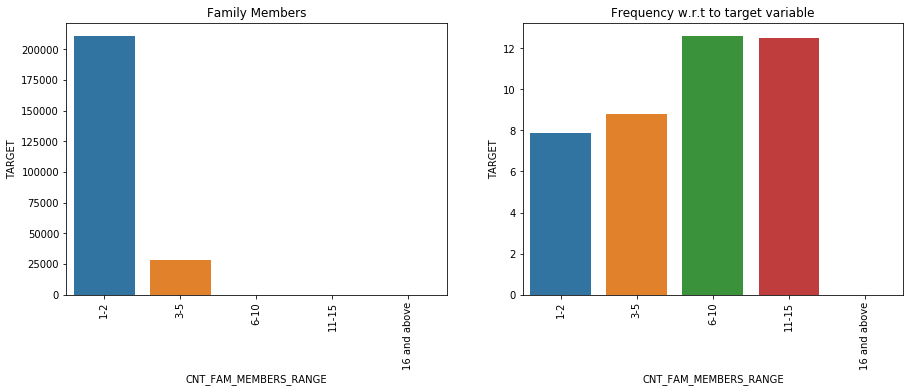

In [29]:
plt.figure(figsize=(15,5))

data = round(target_1.groupby(['CNT_FAM_MEMBERS_RANGE'])['TARGET'].count()/application_data.groupby(['CNT_FAM_MEMBERS_RANGE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['CNT_FAM_MEMBERS_RANGE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Family Members')
plt.xticks(rotation=90)
sns.barplot(x='CNT_FAM_MEMBERS_RANGE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='CNT_FAM_MEMBERS_RANGE', y='TARGET', data=data)

data

### Column `NAME_HOUSING_TYPE`

##### Conclusion

The count of housing type in `application_data` dataset as House/Apartment highest frequency but when compared W.R.T target variable `Rented apartment` people `12.31%` chances of being at default.

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,12.31
5,With parents,11.70
2,Municipal apartment,8.54
0,Co-op apartment,7.93
1,House / apartment,7.80
3,Office apartment,6.57


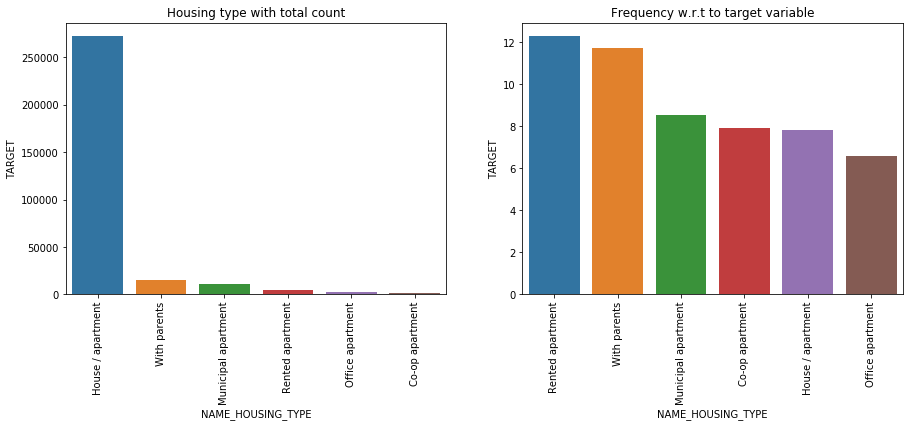

In [30]:
plt.figure(figsize=(15,5))

data = round(target_1.groupby(['NAME_HOUSING_TYPE'])['TARGET'].count()/application_data.groupby(['NAME_HOUSING_TYPE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['NAME_HOUSING_TYPE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Housing type with total count')
plt.xticks(rotation=90)
sns.barplot(x='NAME_HOUSING_TYPE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='NAME_HOUSING_TYPE', y='TARGET', data=data)

data

### Column `DAYS_BIRTH`

**Note:** We are using column `AGE_BIRTH_RANGE` which we created in binning section.

##### Conclusion

The age range is between appx 20 and 69, and the loan is taken majorly by age range `54-60`.

When compared to target variable, it turned out to be that the age range `20-30` seems to be having problem majorly in payments and reduces as the age increases.

,AGE_BIRTH_RANGE,TARGET
5,54-60,48132
3,42-47,47290
1,31-36,47236
0,20-30,45021
2,37-41,43690
4,48-53,40563
6,61-above,35579


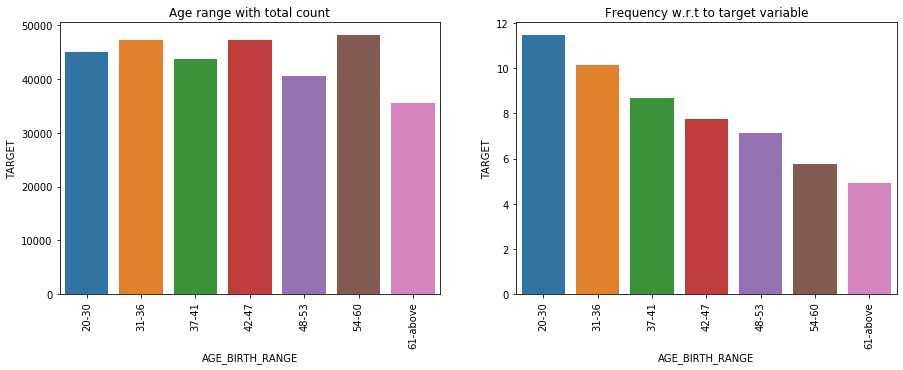

In [31]:
plt.figure(figsize=(15,5))

data = round(target_1.groupby(['AGE_BIRTH_RANGE'])['TARGET'].count()/application_data.groupby(['AGE_BIRTH_RANGE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['AGE_BIRTH_RANGE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Age range with total count')
plt.xticks(rotation=90)
sns.barplot(x='AGE_BIRTH_RANGE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='AGE_BIRTH_RANGE', y='TARGET', data=data)

all_data

### Column `ORGANIZATION_TYPE`

##### Conclusion

When looking at the entire dataset, most of the applicant's type of organization type is `Business Entity Type3` and default in payments turns out to be from organization type `Transport Type3` with appx rate of `~16%`.

,ORGANIZATION_TYPE,TARGET
5,Business Entity Type 3,67992
57,XNA,55374
42,Self-employed,38412
33,Other,16683
30,Medicine,11193


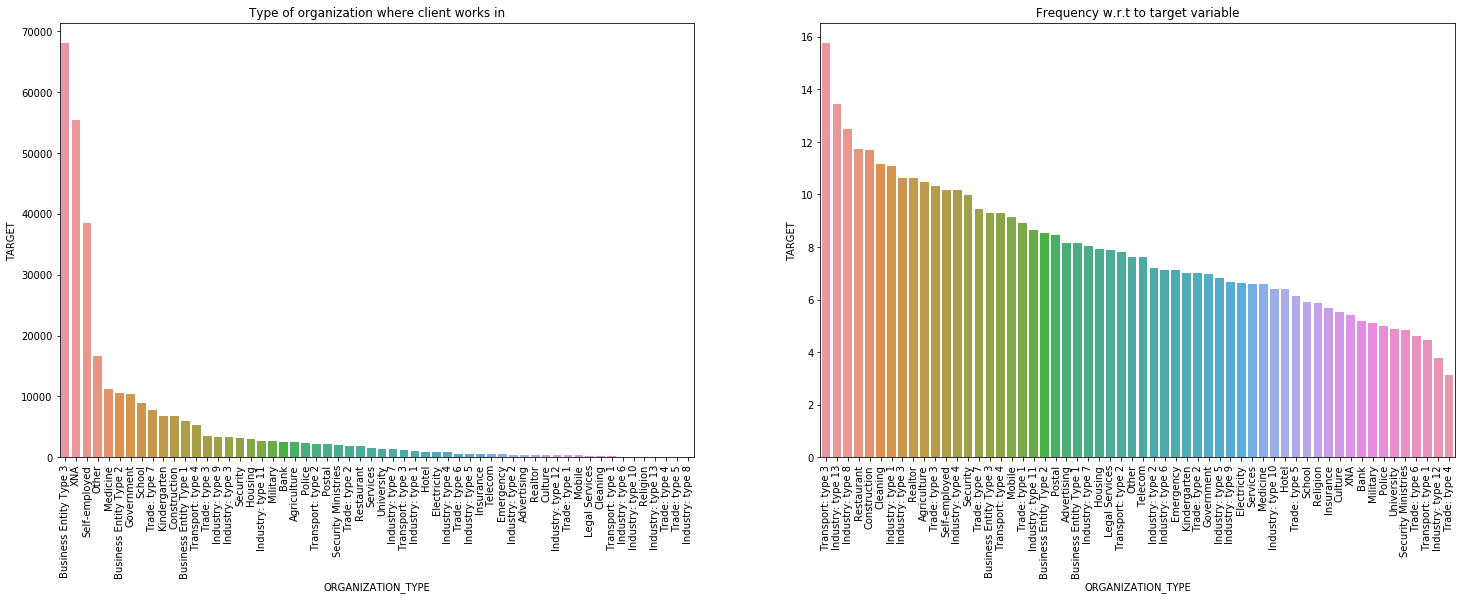

In [32]:
plt.figure(figsize=(25,8))

data = round(target_1.groupby(['ORGANIZATION_TYPE'])['TARGET'].count()/application_data.groupby(['ORGANIZATION_TYPE'])['TARGET'].count() * 100, 2).reset_index().sort_values(by='TARGET', ascending=False)
all_data = application_data.groupby(['ORGANIZATION_TYPE'])['TARGET'].count().reset_index().sort_values(by='TARGET', ascending=False)

plt.subplot(1, 2, 1)
plt.title('Type of organization where client works in')
plt.xticks(rotation=90)
sns.barplot(x='ORGANIZATION_TYPE',y='TARGET', data=all_data)

plt.subplot(1, 2, 2)
plt.title('Frequency w.r.t to target variable')
plt.xticks(rotation=90)
sns.barplot(x='ORGANIZATION_TYPE', y='TARGET', data=data)

all_data.head(5)

## Bi-Variate Analysis

In [68]:
num_df = application_data[['TARGET','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR', 'REG_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY']]

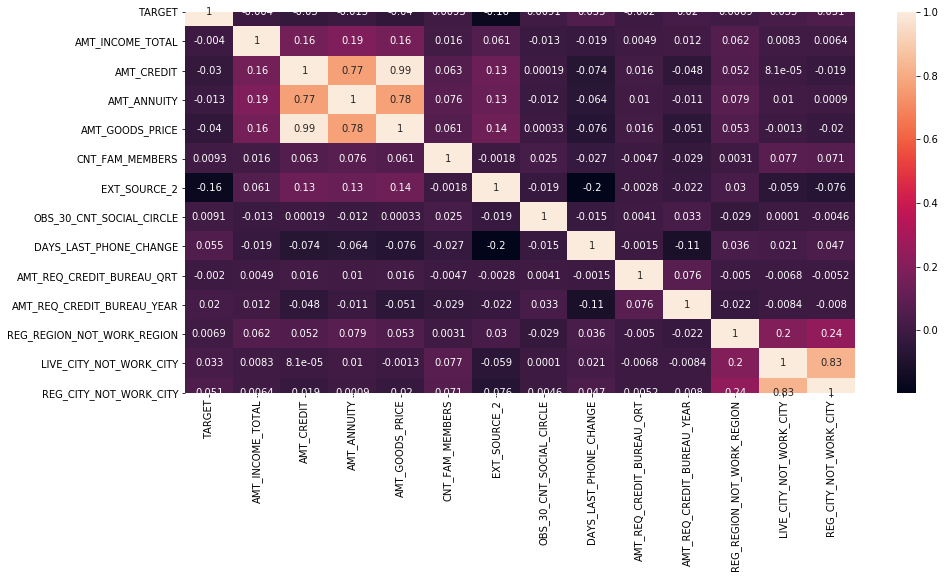

In [69]:
plt.figure(figsize = (15,7))

corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot =True)

In [70]:
corrdf = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [71]:
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf

,Var1,Var2,Correlation
0,TARGET,TARGET,NaN
1,TARGET,AMT_INCOME_TOTAL,NaN
2,TARGET,AMT_CREDIT,NaN
3,TARGET,AMT_ANNUITY,NaN
4,TARGET,AMT_GOODS_PRICE,NaN
...,...,...,...
191,REG_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_QRT,-0.005227
192,REG_CITY_NOT_WORK_CITY,AMT_REQ_CREDIT_BUREAU_YEAR,-0.008013
193,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_WORK_REGION,0.239765
194,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.825575


In [72]:
corrdf.dropna(subset = ['Correlation'], inplace = True)

In [73]:
positive = corrdf[corrdf['Correlation'] > 0].sort_values(by='Correlation', ascending=False)
negative = corrdf[corrdf['Correlation'] < 0].sort_values(by='Correlation', ascending=True)

#### Topmost co-related (Positive & Negative) columns 

We will be performing Bi-Variate analysis on below columns from positive correlated variables.

1. **Var 1** - AMT_GOODS_PRICE, **Var 2** - AMT_CREDIT
2. **Var 1** - REG_CITY_NOT_WORK_CITY, **Var 2** - LIVE_CITY_NOT_WORK_CITY
3. **Var 1** - AMT_GOODS_PRICE, **Var 2** - AMT_ANNUITY
4. **Var 1** - AMT_ANNIUTY, **Var 2** - AMT_CREDIT

As negative correlated variables are not highly correlated as they are much close to zero than to -1, we can say that they are not highly correlated can be neglected from analysis.

In [104]:
positive.head()

,Var1,Var2,Correlation
58,AMT_GOODS_PRICE,AMT_CREDIT,0.986968
194,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.825575
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.775109
44,AMT_ANNUITY,AMT_CREDIT,0.770138
193,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_WORK_REGION,0.239765


In [101]:
negative.head()

,Var1,Var2,Correlation
118,DAYS_LAST_PHONE_CHANGE,EXT_SOURCE_2,-0.195764
84,EXT_SOURCE_2,TARGET,-0.160472
148,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_LAST_PHONE_CHANGE,-0.112725
116,DAYS_LAST_PHONE_CHANGE,AMT_GOODS_PRICE,-0.076313
188,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_2,-0.075970


## Reading `previous_application.csv`

In [124]:
previous_application = pd.read_csv('./previous_application.csv')

previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Decision frequency

From the previous year's total applied application almost `62%` were approved, while ~18% were canceled, ~17% were refused and ~1% were Unused offer.

Approved        62.07
Canceled        18.94
Refused         17.40
Unused offer     1.58
Name: NAME_CONTRACT_STATUS, dtype: float64


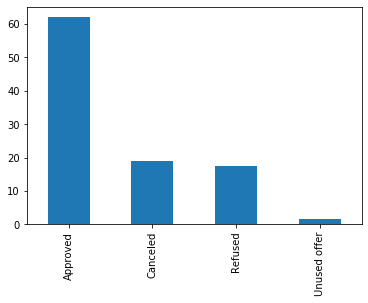

In [156]:
approvals = round(previous_application['NAME_CONTRACT_STATUS'].value_counts(normalize=True) * 100, 2)
print(approvals)

approvals.plot.bar()
plt.show()

### Merging `application_data` and `previous_application`

In [157]:
applications = pd.merge(left=application_data, right=previous_application, how='inner', on='SK_ID_CURR')

In [252]:
columns = round(applications.isnull().sum() / len(applications) * 100, 2)
applications = applications.drop(columns[columns >= 50].index, axis=1)

applications.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_TOTAL_RANGE,CNT_FAM_MEMBERS_RANGE,AGE_BIRTH_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,400001 - 600000,2Lac-5Lac,NaN,20-30,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1000001 and above,2Lac-5Lac,1-2,42-47,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1000001 and above,2Lac-5Lac,1-2,42-47,2636178,Consumer loans,64567.665,3375

## Analysis

### Column `NAME_CONTRACT_TYPE`

##### Conclusion

In the analysis, it is uncovered, that `Cash loans` were approved at the highest rate than compared to `Revolving loans`.

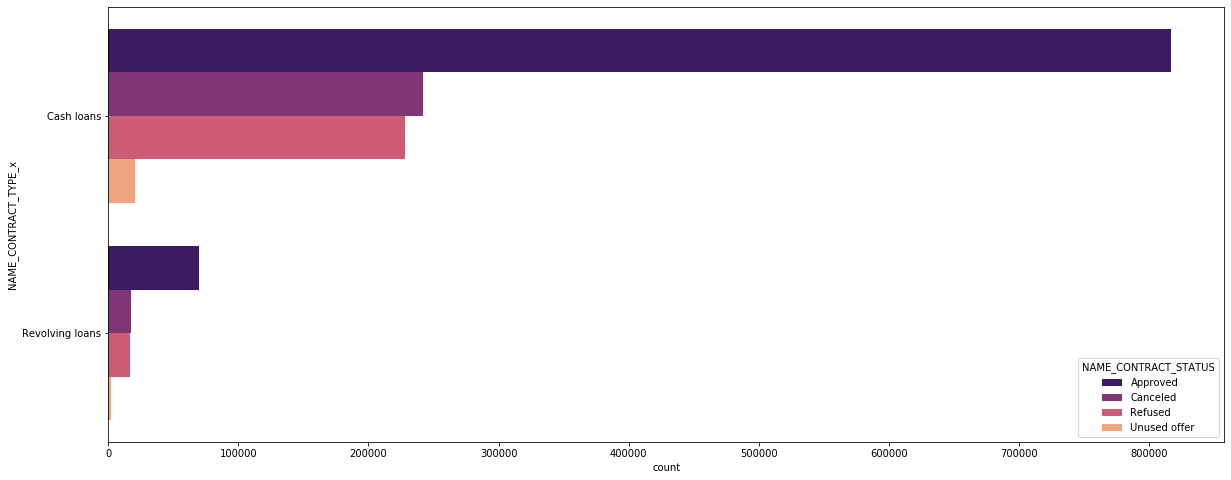

In [208]:
plt.figure(figsize=(20,8))

sns.countplot(data = applications,y = 'NAME_CONTRACT_TYPE_x', hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `AMT_INCOME_TOTAL`

##### Conclusion

Loan was approved mostly for clients with income range of `1Lac to 2Lacs`, follwed by `2Lacs to 5Lacs`, while surprisingly, loan application was also canceled for the `1Lac to 2Lacs` is also highest followed by `2Lacs to 5Lacs` income range.

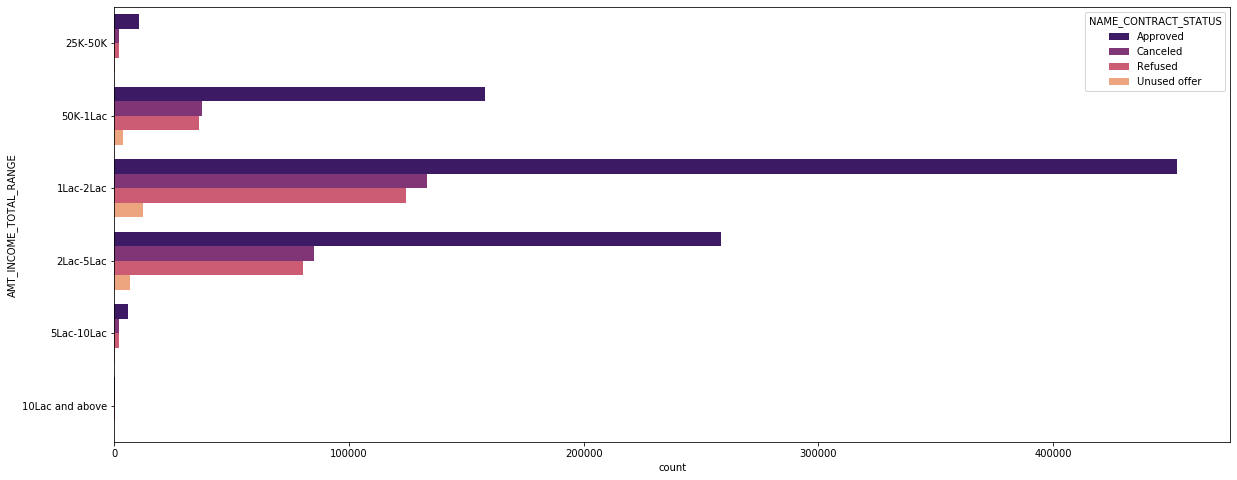

In [211]:
plt.figure(figsize=(20,8))

sns.countplot(data = applications, y='AMT_INCOME_TOTAL_RANGE', hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `ORGANIZATION_TYPE`

Most of the loans were approved with client organization's stype `Business Entity Type 3` and then followed by clients whom organization type is unknown.

Loan was also canceled by client's whom organization type is unknown.

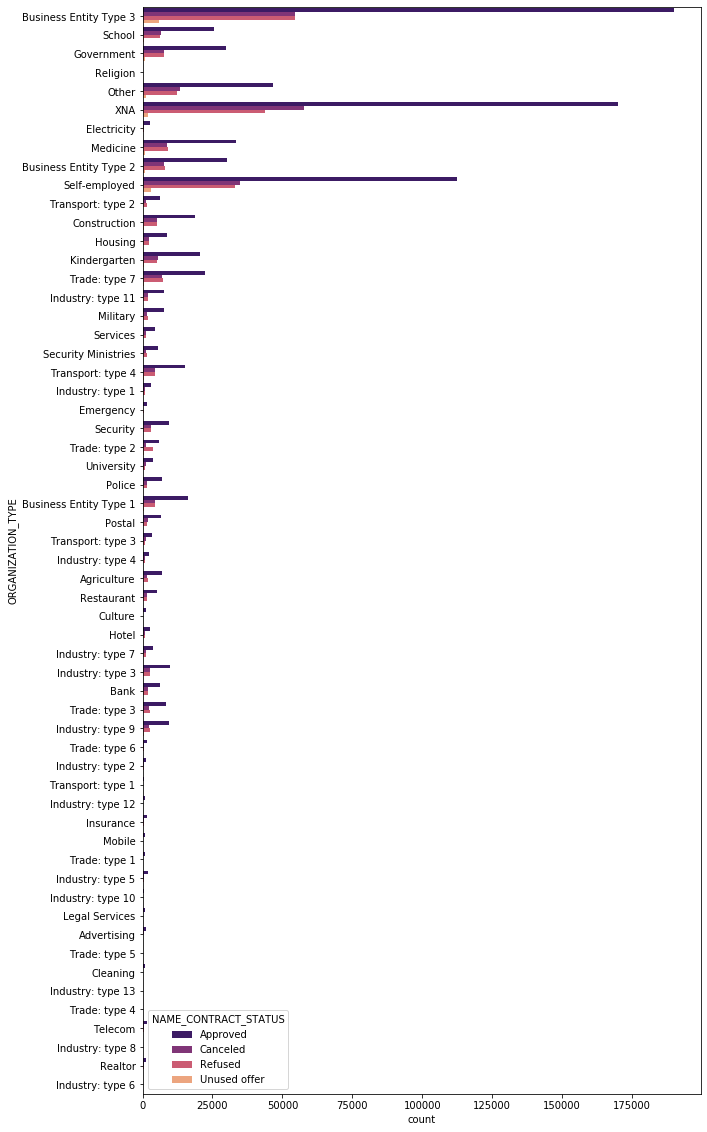

In [230]:
plt.figure(figsize=(10,20))
sns.countplot(data = applications, y='ORGANIZATION_TYPE', hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `AGE_BIRTH`

##### Conclusion

Loan was approved majorly for client's with age range `54-60` follwed by range `42-47` the `31-36`. Loan is canceled by clients highly in range `54-60` followed by age range `61-above`.

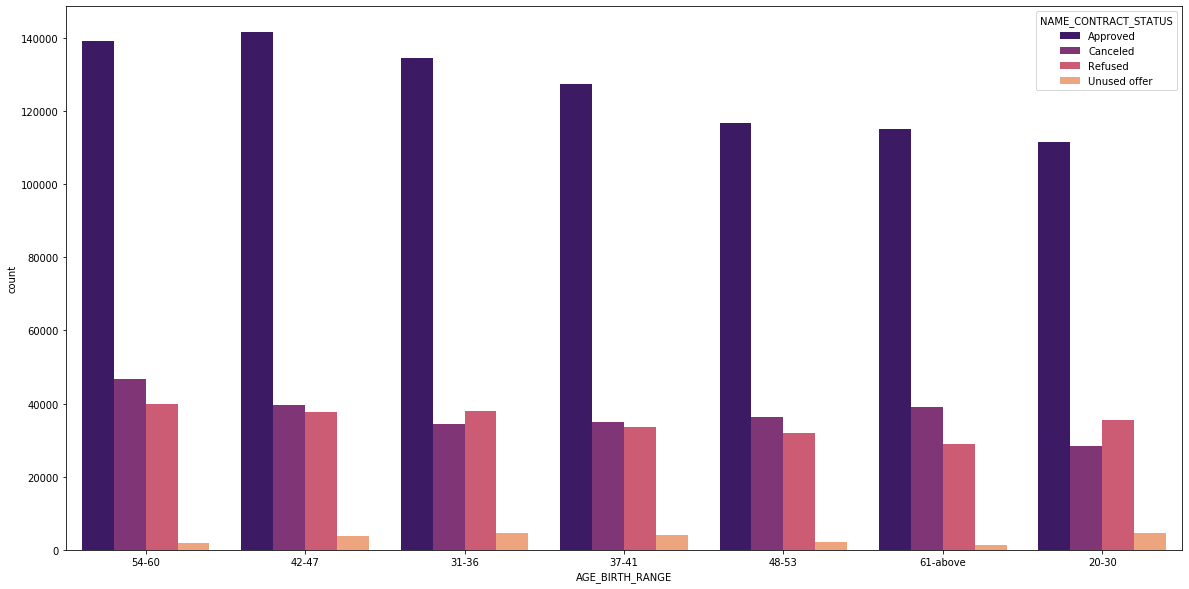

In [235]:
plt.figure(figsize=(20,10))
sns.countplot(data = applications, x='AGE_BIRTH_RANGE', order=applications['AGE_BIRTH_RANGE'].value_counts().index, hue = 'NAME_CONTRACT_STATUS',palette='magma')

### Column `NAME_CLIENT_TYPE`

##### Conclusion

Almost `73%` of the clients are repeating clients.

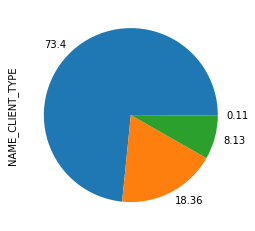

In [251]:
client_type = round(applications['NAME_CLIENT_TYPE'].value_counts(normalize=True) * 100, 2)

client_type.plot.pie(labels=client_type.values)